In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [198]:
datapath='data.txt'
df = pd.read_csv(datapath,header=None,names=['Population','Profit'])
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [199]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


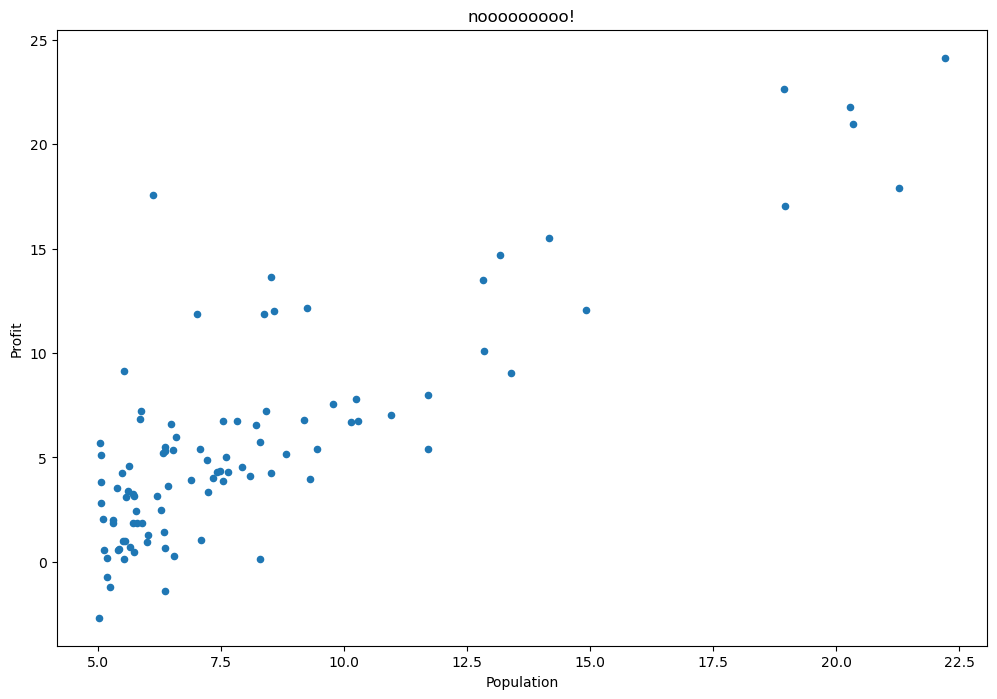

In [200]:
df.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('nooooooooo!')
plt.show()

In [201]:
def computecost(x,y,theta):
    inner = np.power(((x * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(x))

In [202]:
df.insert(0,'Ones',1)
x=df.iloc[:,:2]
y=df.iloc[:,2:]

In [203]:
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [204]:
computecost(x, y, theta)

32.072733877455676

In [205]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computecost(x, y, theta)
        
    return theta, cost

In [206]:
alpha = 0.01
iters = 1000

In [207]:
g, cost = gradientDescent(x, y, theta, alpha, iters)

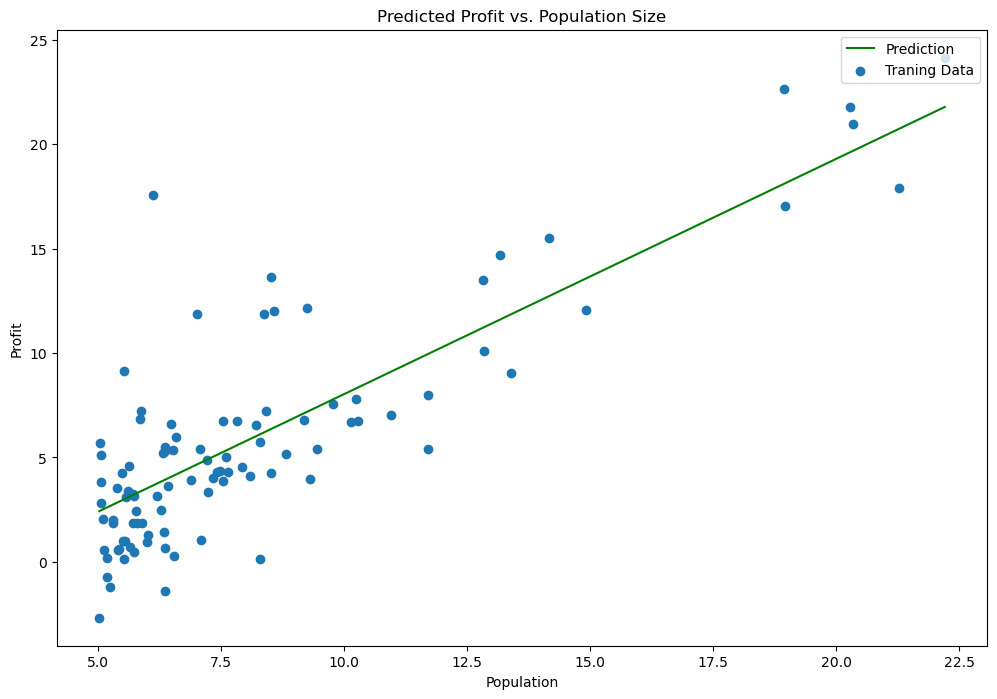

In [208]:
x = np.linspace(df.Population.min(), df.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'g', label='Prediction')
ax.scatter(df.Population, df.Profit, label='Traning Data')
ax.legend(loc=1)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()